<a href="https://colab.research.google.com/github/jaaaamj0711/DACON/blob/main/Basic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💳 신용카드 예측 EDA

## 목차
(1) 결측치 확인및 데이터 형 변환  

(2) Categorical Variable  EDA  

(3) Numerical Variable EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 사용을 위한 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [3]:
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [4]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
Nanum Brush Script = /usr/share/fonts/truetype/nanum/NanumBrush.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
Nanu

In [5]:
train = pd.read_csv("/content/drive/MyDrive/open/train.csv")

In [6]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


## (1) 결측치 확인및 데이터 형 변환

### **결측치 확인**

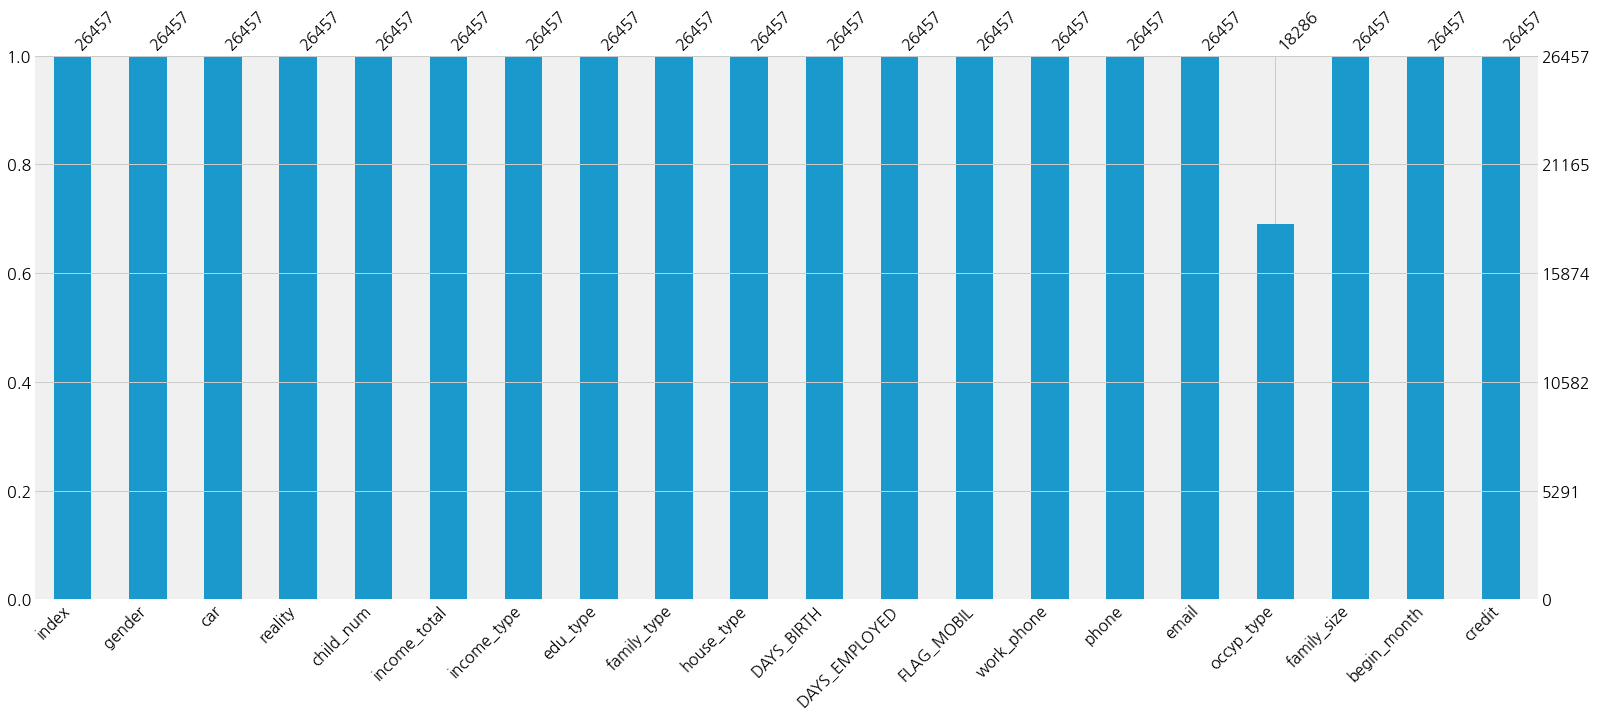

In [7]:
import missingno as msno
msno.bar(df=train.iloc[:, :], color=(0.1, 0.6, 0.8))

- 직업 유형 변수에서 결측치가 존재한다.


### 데이터 형 변환

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [9]:
# credit 형 변환
train = train.astype({'credit': 'object'})
print(train.dtypes)

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit            object
dtype: object


## (2) Categorical Variable EDA

### **％ 신용 등급 비율은 어떻게 될까?**

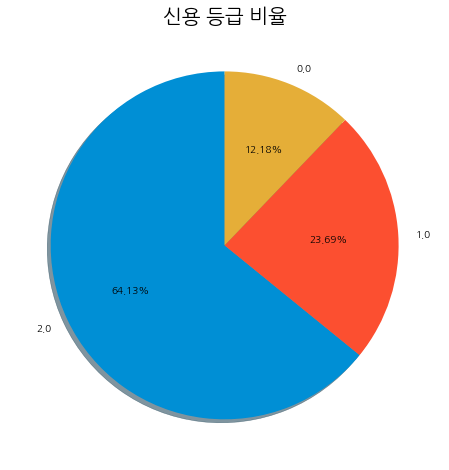

In [10]:
plt.subplots(figsize = (8,8))
plt.pie(train['credit'].value_counts(), labels = train['credit'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('신용 등급 비율', size=20)
plt.show()

- 낮을수록 높은 신용의 신용카드 사용자를 의미한다. 따라서 낮은 신용의 신용카드 사용자가 많다는 것을 알 수 있다.

In [11]:
# 등급에 따른 차이를 보기 위한 데이터 분류
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

신용 등급에 따른 차이를 알아보기 위해 다음과 같이 데이터를 분리하도록 하겠습니다.

In [12]:
# Categorical 그래프 함수 정의
def cat_plot(column):

  f, ax = plt.subplots(1, 3, figsize=(16, 6))


  sns.countplot(x = column,
                data = train_0,
                ax = ax[0],
                order = train_0[column].value_counts().index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('credit = 0')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=50)


  sns.countplot(x = column,
                data = train_1,
                ax = ax[1],
                order = train_1[column].value_counts().index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('credit = 1')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=50)

  sns.countplot(x = column,
                data = train_2,
                ax = ax[2],
                order = train_2[column].value_counts().index)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('credit = 2')
  ax[2].set_ylabel('count')
  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

### 🙋🏻‍♀️🙋🏻‍♂️**신용 등급에 따라 성별 차이가 존재할까?**

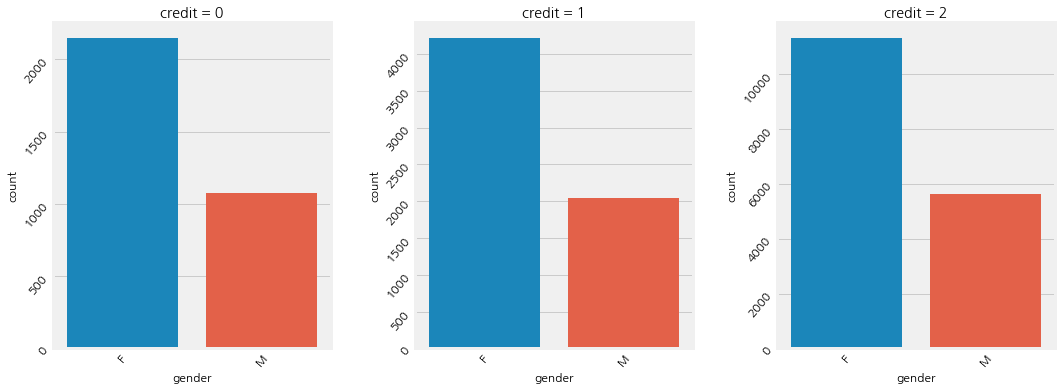

In [13]:
cat_plot("gender")

- 모든 등급에서 남성보다 여성이 더 많았다.

### 🚗 **신용 등급에 따라 차량 소유 차이가 존재할까?**

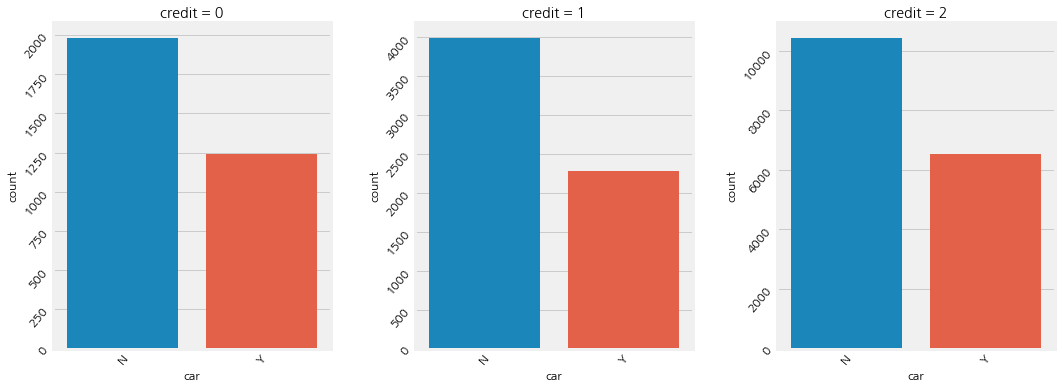

In [14]:
cat_plot('car')

- 모든 등급에서 차를 보유하고 있지 않은 고객들이 많았다.

### 🏠 **신용 등급에 따라 부동산 소유 차이가 존재할까?**

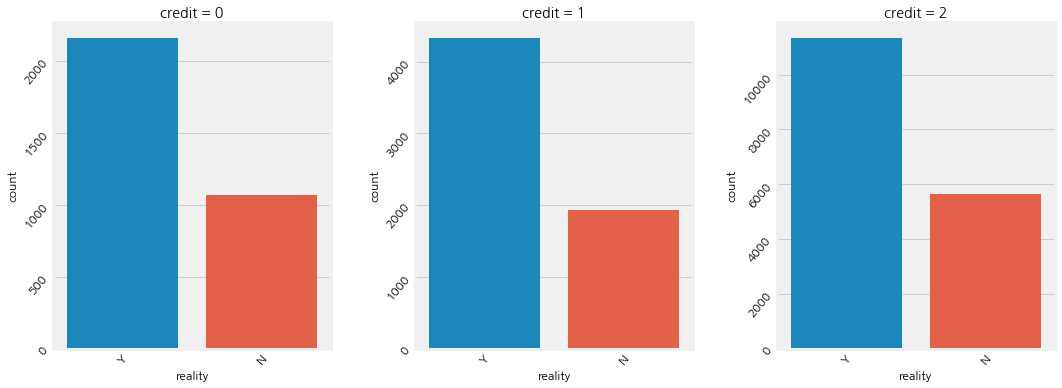

In [15]:
cat_plot('reality')

- 모든 등급에서 부동산을 소유한 사람들이 많았다. 딱히 등급에 따른 차이가 존재하지 않는다.

### 💶 **신용 등급에 따라 소득 분류의 차이가 존재할까?**

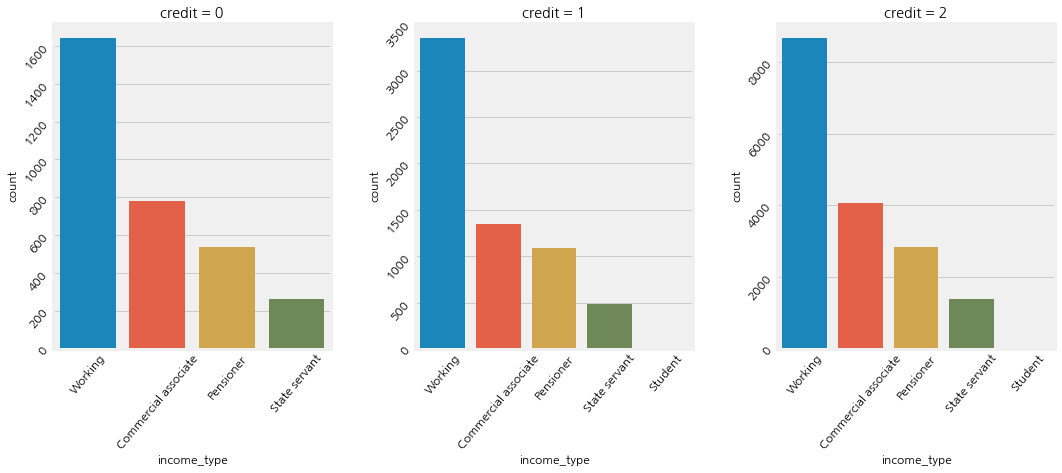

In [16]:
cat_plot('income_type') 

- 높은 신용에서는 학생이 존재하지 않았다. 학생의 신분 특성상 높은 신용을 가지고 있기는 어렵기 때문에 다음과 같은 결과가 나왔다고 생각한다.
- 반면 낮은 신용에서는 학생들이 조금씩 존재했다.

### 🎓**신용 등급에 따라 교육 수준 차이가 존재할까?**

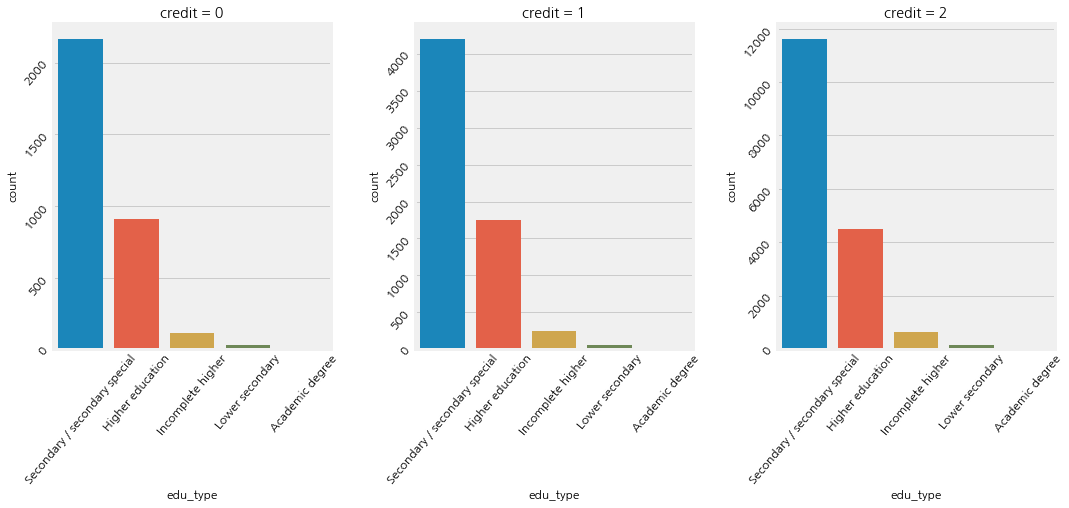

In [17]:
cat_plot('edu_type')

- 모든 등급에서 교육 수준의 순위가 같았다.

### 👰🏻🤵🏻‍♂️**신용 등급에 따라 결혼 여부 차이가 존재할까?**

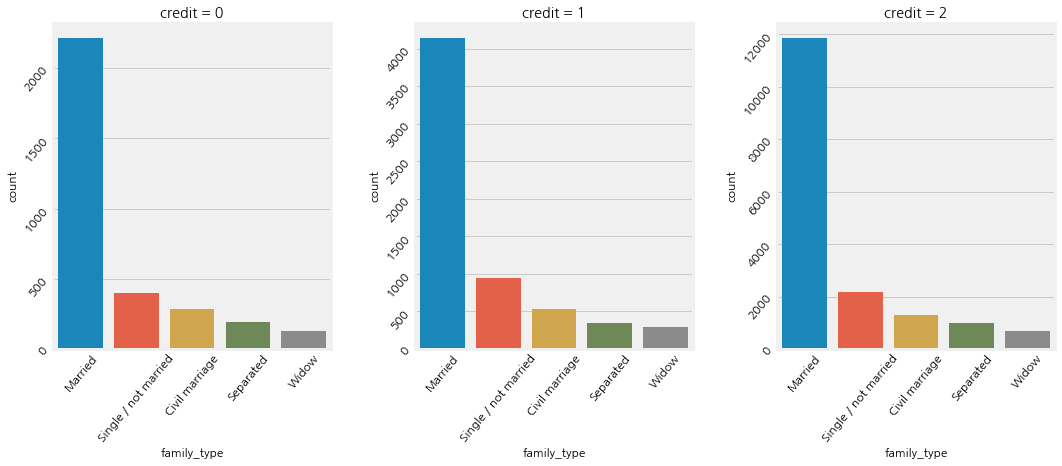

In [18]:
cat_plot('family_type')

- 모든 등급에서 결혼을 한 사람들이 가장 많았다.
- 결혼을 한 사람들이 상대적으로 많이 존재한다.


### 🏘 **신용 등급에 따라 생활 방식 차이가 존재할까?**

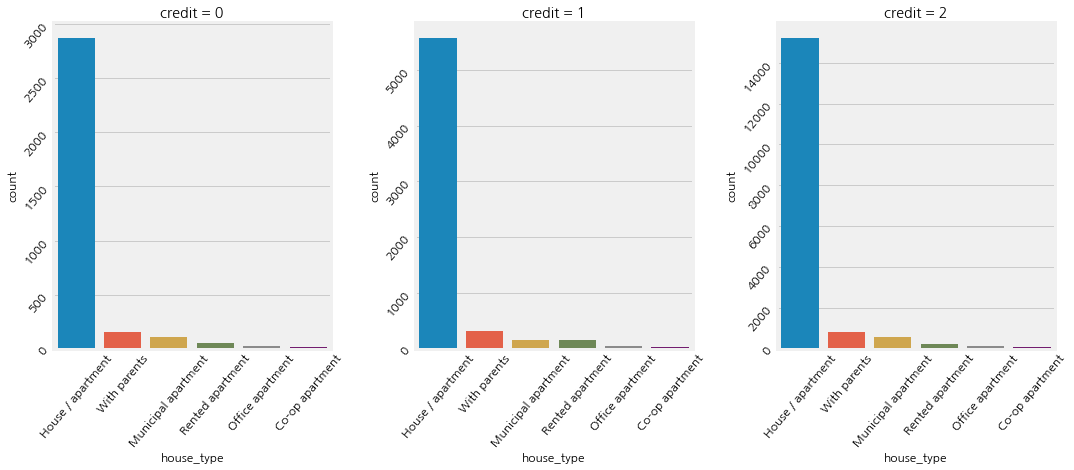

In [19]:
cat_plot('house_type')

- 모든 등급에서 교육 수준의 순위가 같았다.

### 📱**신용 등급에 따라 핸드폰 소지 차이가 존재할까?**

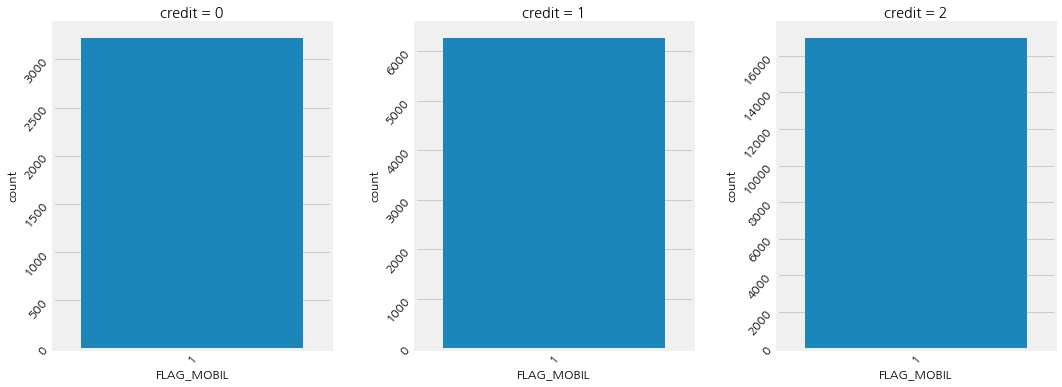

In [20]:
cat_plot('FLAG_MOBIL')

- 모든 사람들이 휴대폰을 소지하고 있다.

### ☎️ **신용 등급에 따라 가정용 전화 소유 차이가 존재할까?**

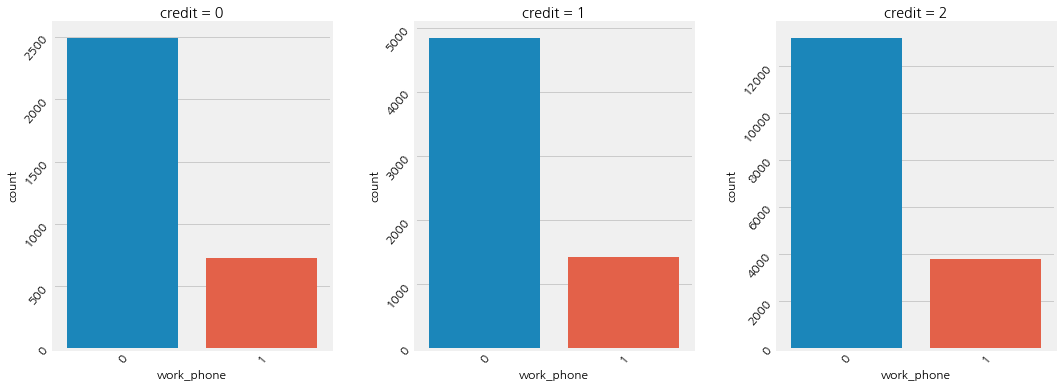

In [21]:
cat_plot('work_phone')

- 모든 등급에서 가정용 전화를 소유하고 있지 않는 사람들이 많았다.
- 요즘은 휴대용 핸드폰을 많이 사용하기 때문에 다음과 같은 결과가 나왔다고 생각한다.


### 📨**신용 등급에 따라 이메일 소유 차이가 존재할까?**

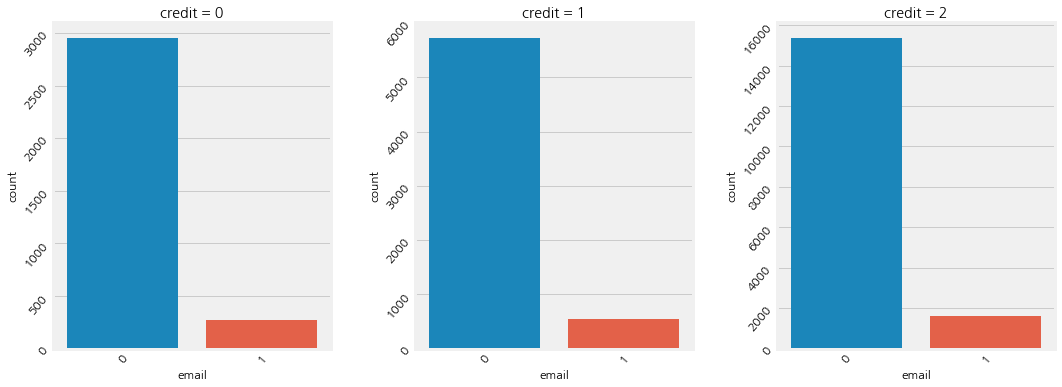

In [22]:
cat_plot('email')

- 모든 등급에서 이메일을 소유한 사람들이 훨씬 많았다.

### 🏃🏻‍♂️**신용 등급에 따라 직업 유형 차이가 존재할까?**

해당 변수는 결측치가 존재했다. 변수 이름으로 생각해 봤을때 직업이 없는 사람으로 예상이 되는 관계로 "No job" 이라는 값을도 대체하도록 하자.


In [23]:
train_0 = train_0.fillna({'occyp_type':'No job'})
train_1 = train_1.fillna({'occyp_type':'No job'})
train_2 = train_2.fillna({'occyp_type':'No job'})

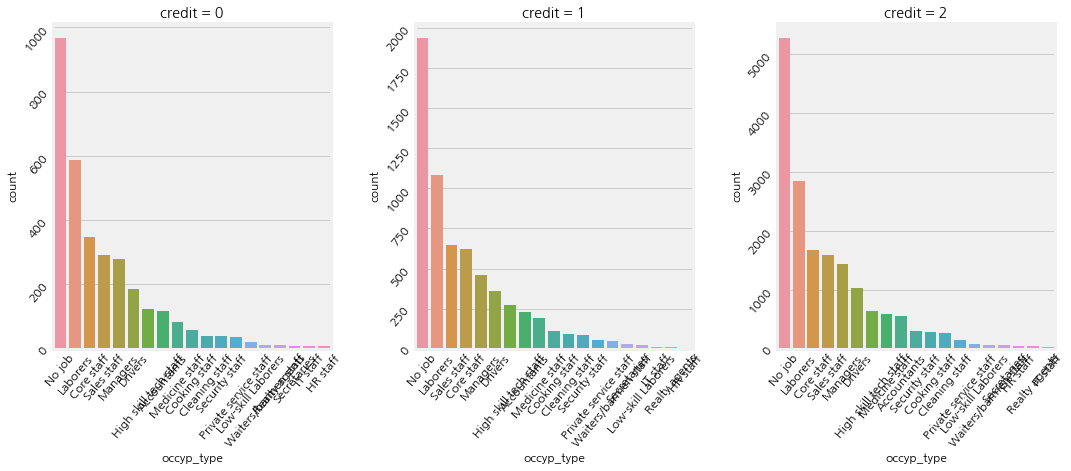

In [24]:
cat_plot('occyp_type')

- 모든 등급에서 직업이 없는 사람들이 많았다.
- 0, 1 등급에서는 cooking staff가 존재하지만 2 등급에서는 존재하지 않았다.
- 0, 1 등급에서는 없던 Security staff가 2 등급에서는 존재하였다.


In [25]:
train['begin_month']

0        -6.0
1        -5.0
2       -22.0
3       -37.0
4       -26.0
         ... 
26452    -2.0
26453   -47.0
26454   -25.0
26455   -59.0
26456    -9.0
Name: begin_month, Length: 26457, dtype: float64

In [26]:
# Numerical 그래프 함수 정의
def num_plot(column):
  
  fig, axes = plt.subplots(1, 3, figsize=(16, 6))


  sns.distplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.distplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.distplot(train_2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

###👶🏻 **신용 등급에 따라 자녀수의 차이가 존재할까?**

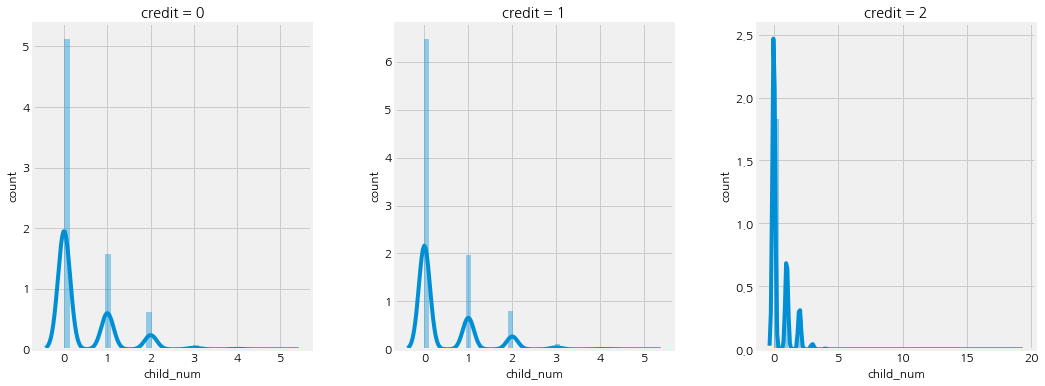

In [27]:
num_plot("child_num")

- 자녀의 수도 별다른 차이가 없어 보인다.



### 💰 **신용 등급에 따라 연간 소득 차이가 존재할까?**

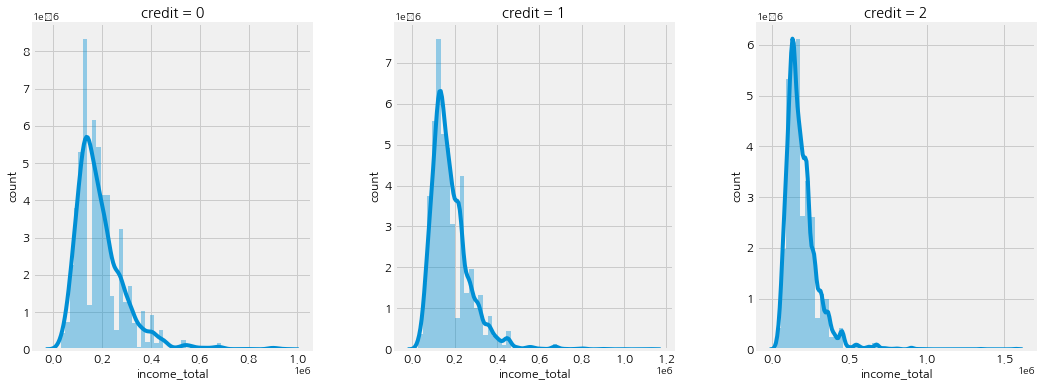

In [28]:
num_plot("income_total")

- 신용 등급에 따라 연간 소득 차이는 없어 보인다.

좀 더 자세히 비교해 보기 위해 그래프를 겹쳐서 그려보았다.


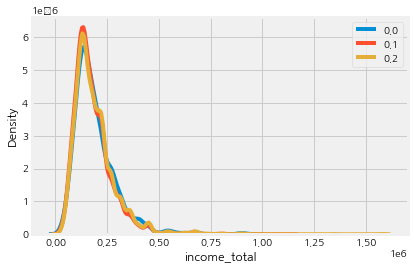

In [29]:
sns.distplot(train_0['income_total'],label='0.0', hist=False)
sns.distplot(train_1['income_total'],label='0.1', hist=False)
sns.distplot(train_2['income_total'],label='0.2', hist=False)
plt.legend()

- 겹처서 확인했을때도 별다른 차이가 없어 보인다.


### 👵🏻👧🏻👩🏻‍🦱 **신용 등급에 따라 연령대 차이가 존재할까?**

데이터 전처리를 통해 Age 변수를 도출하였습니다.

In [30]:
train_0['Age'] = abs(train_0['DAYS_BIRTH'])/360
train_1['Age'] = abs(train_1['DAYS_BIRTH'])/360
train_2['Age'] = abs(train_2['DAYS_BIRTH'])/360
train_0['Age'].head()

3     41.911111
7     41.377778
12    33.161111
15    35.719444
22    42.216667
Name: Age, dtype: float64

In [31]:
train_0 = train_0.astype({'Age': 'int'})
train_1 = train_1.astype({'Age': 'int'})
train_2 = train_2.astype({'Age': 'int'})
train_0['Age'].head()

3     41
7     41
12    33
15    35
22    42
Name: Age, dtype: int64

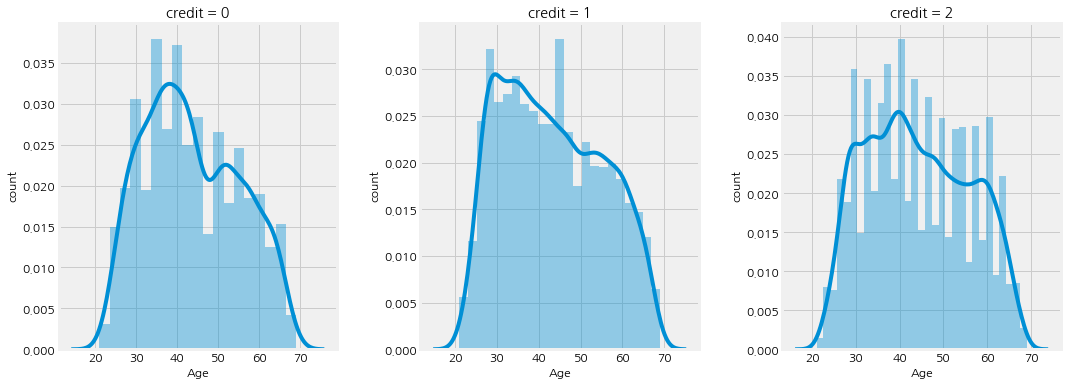

In [32]:
num_plot("Age")

- 등급별로 큰 차이는 없어 보이지만, 20~30대의 경우 비율이 낮은 것으로 나타났습니다.


DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit            object

### **🗓신용 등급에 따라 업무 기간 차이가 존재할까?**

업무 기간을 연도 단위로 분석해 보기 위해 전처리를 진행하였습니다.  

양수는 고용되지 않은 상태로 무직을 의미하기 때문에 0으로 대체를 하도록 하겠습니다.

In [33]:
train_0['EMPLOYED']= train_0['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)

In [34]:
train_0['EMPLOYED']= train_0['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_1['EMPLOYED']= train_1['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_2['EMPLOYED']= train_2['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
train_0['EMPLOYED'] = abs(train_0['EMPLOYED'])/360
train_1['EMPLOYED'] = abs(train_1['EMPLOYED'])/360
train_2['EMPLOYED'] = abs(train_2['EMPLOYED'])/360
train_0['EMPLOYED'].head()

3      5.811111
7     15.055556
12     6.005556
15    11.266667
22     3.769444
Name: EMPLOYED, dtype: float64

In [35]:
train_0 = train_0.astype({'EMPLOYED': 'int'})
train_1 = train_1.astype({'EMPLOYED': 'int'})
train_2 = train_2.astype({'EMPLOYED': 'int'})

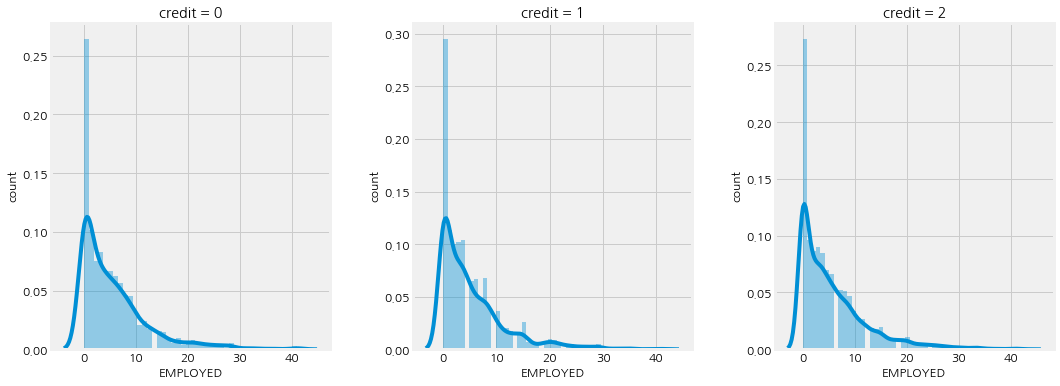

In [36]:
num_plot("EMPLOYED")

- 대체적으로 직업이 없는 사람들이 많습니다.
- 등급별로 별다른 차이는 없었습니다.

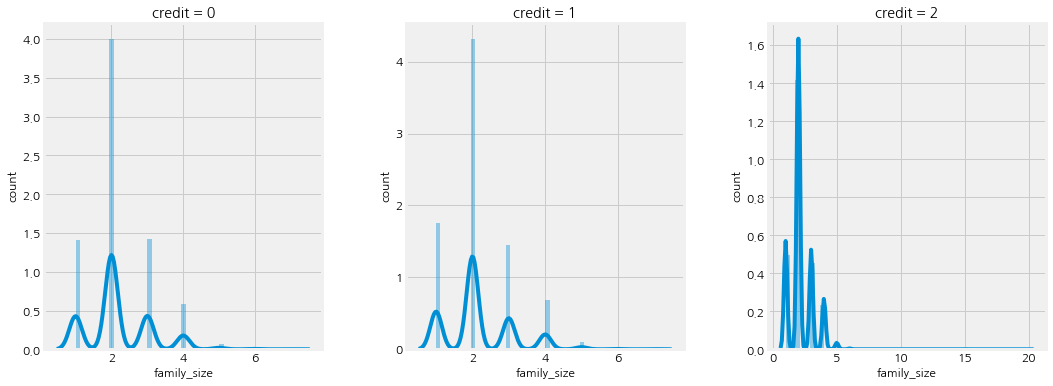

In [37]:
num_plot("family_size")

- 보통 가족 수가 2명인 사람들이 많았습니다.
- 결혼한 사람들이 많았던 결과와 연관되는 결과입니다.
- 2등급에서는 1,2에 비해 왼쪽으로 치우진 그래프가 나왔습니다.


### **💳 신용 등급에 따라 카드 발급 기간 차이가 존재할까?**

전처리를 진행 후 Month 변수를 도출하였습니다.


In [38]:
train_0['Month'] = abs(train_0['begin_month'])
train_1['Month'] = abs(train_1['begin_month'])
train_2['Month'] = abs(train_2['begin_month'])
train_0 = train_0.astype({'Month': 'int'})
train_1 = train_1.astype({'Month': 'int'})
train_2 = train_2.astype({'Month': 'int'})
train_0['Month'].head()

3     37
7     53
12    60
15    60
22    22
Name: Month, dtype: int64

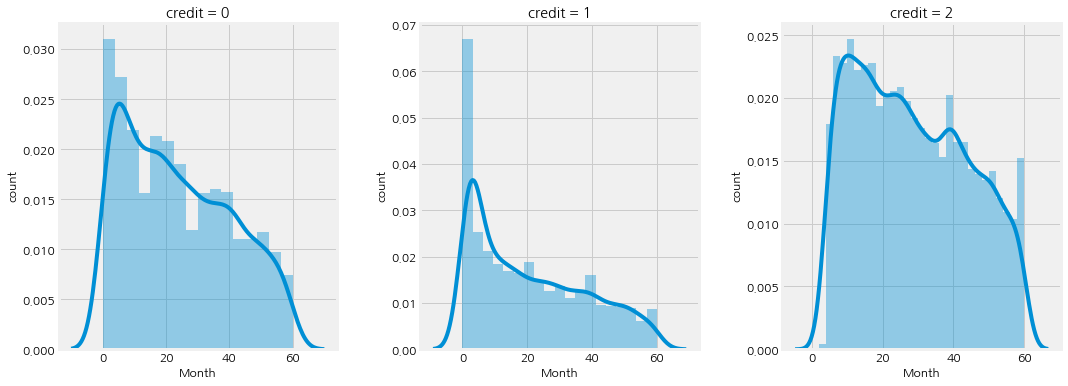

In [39]:
num_plot("Month")

- 대부분 카드를 발급 받은지 10달 이하인 사람들이 많았습니다.